[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1uE3AE_WjgT4vT6--HK6Hry8SJyuuxdPE/view?usp=sharing)

# Classificação

Neste notebook, vamos realizar a tarefa de classificação em duas aplicações práticas. A primeira diz respeito à determinação de uma condição de saúde de um paciente (se possui ou não diabetes) com base em dados clínicos. Para isso, vamos utilizar uma rede **MLP**.

No segundo caso, vamos realizar a classificação de imagens também utilizando uma MLP. O objetivo é distinguir entre dígicos escritos a mão.

## Diabetes



## Importação das bibliotecas

Primeiro de tudo, vamos importar alguns pacotes para fazer uso posterior. O destaque aqui vai para o `sklearn`, que possui um conjunto de funções para uso nesse contexto.

In [1]:
# importar os pandas para armazenar os dados em dataframes
import pandas as pd
# o numpy é utilizado para realizar algumas operações em dados
import numpy as np
# a funcao train_test_split é usada para dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
# essas duas funcoes sao usadas para analisar os resultados
from sklearn.metrics import classification_report, confusion_matrix
# o metodo cross_validate é usado para realizar a divisão dos dados
from sklearn.model_selection import cross_validate
# existe uma classe que implementa as MLPs
from sklearn.neural_network import MLPClassifier
# esse pacote contém um conjunto de datasets prontos para serem utilizados
from sklearn import datasets
# gdown para baixar os dados
import gdown

## Obter os dados

Para o primeiro caso de uso, vamos baixar os dados de pacientes que tiveram resultados clínicos anotados. Para cada paciente, existem dados referentes a:

- gravidez (número de vezes grávida)
- nível de glicose (concentração de glicose em teste de tolerância)
- pressão diastólica
- espessura da pele do trícpes
- nível de insulina
- bmi (índice de massa corporal)
- dbf (diabetes pedrigree function)
- idade
- diabetes (1 = diabetes, 0 = não diabetes)

Todos os pacientes são do sexo feminino e de origem *Pima Indian*. 

O [dataset original](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) pode ser encontrado no repositório [Kaggle](https://www.kaggle.com/).

In [2]:
url = 'https://drive.google.com/file/d/1dTbUFf-JiZhbuCxqF3nl-tkR9umVNqDt/view?usp=sharing'
output = 'diabetes.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1dTbUFf-JiZhbuCxqF3nl-tkR9umVNqDt
To: /content/diabetes.csv
100%|██████████| 25.8k/25.8k [00:00<00:00, 4.81MB/s]


'diabetes.csv'

Para ter uma noção de como os dados são apresentados, vamos olhar as cinco primeiras linhas do dataset.

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Além disso, já vimos como é importante conhecer o tipo de cada uma das *features* do dataset.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Separação do conjunto de dados

Para realizar a predição, vamos precisar construir um classificador. O primeiro passo nessa direção é realizar duas separações:

- dados e classe
- conjunto de treinamento e teste

Separar as features da classe é importante para que essa última não seja também considerada como uma feature do conjunto de dados.

In [5]:
# as primeiras oito colunas do conjunto de dados são as features
X = diabetes.iloc[:,0:8]
# a última coluna se refere a classe
y = diabetes.loc[:,'diabetes']
# exibindo os dados para conferência
print('Features:')
print(X.head())
print('Classe:')
print(y.head())

Features:
   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0            6      148         72       35        0  33.6  0.627   50
1            1       85         66       29        0  26.6  0.351   31
2            8      183         64        0        0  23.3  0.672   32
3            1       89         66       23       94  28.1  0.167   21
4            0      137         40       35      168  43.1  2.288   33
Classe:
0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64


Feita a separação anterior, vamos agora dividir os dados em treinamento e testes para construir o modelo. Primeiro, vamos ver como os dados estão distribuídos entre as classes.

In [6]:
y.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

Para este exemplo, vamos utilizar um *holdout* com 80% dos dados para treinamento e 20% para teste. Como o conjunto de dados é desbalanceado, o parâmetro `stratify` é utilizado para garantir que haja representatividade (proporcionalmente ao conjunto original) das duas classes nos dois conjuntos de dados.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 353 to 107
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  614 non-null    int64  
 1   glucose      614 non-null    int64  
 2   diastolic    614 non-null    int64  
 3   triceps      614 non-null    int64  
 4   insulin      614 non-null    int64  
 5   bmi          614 non-null    float64
 6   dpf          614 non-null    float64
 7   age          614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


Podemos conferir como ficou a distribuição nos dois conjuntos de dados gerados.

In [8]:
y_train.value_counts()

0    400
1    214
Name: diabetes, dtype: int64

In [9]:
y_test.value_counts()

0    100
1     54
Name: diabetes, dtype: int64

## Treinamento

Vamos utilizar uma rede _Multilayer Perceptron_ (MLP) para aprender a diferenciar entre pacientes com diabetes ou não.

Conforme já estudado, alguns parâmetros da rede devem ser ajustados. 

$$$$

- Funções de ativação da MLP:

  - `activation` : `{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}`, default `‘relu’`
    - `‘identity’`, função de atividação linar. Retona $f(x) = x$.
    - `‘logistic’`, função sigmoide logística. Retorna $f(x) = 1 / (1 + exp(-x))$.
    - `‘tanh’`, função tangente hiperbólica. Retorna $f(x) = tanh(x)$.
    - `‘relu’`, função linear retificada. Retorna $f(x) = max(0, x)$.

- Algoritmo de otimização dos pesos

  - `solver : {‘lbfgs’, ‘sgd’, ‘adam’}`, default `‘adam’`.
    - `‘lbfgs’`, otimizador da família dos métodos quasi-Newton
    - `‘sgd’`, gradiente estocástico decendente.
    - `‘adam’`, refere-se ao otimizador baseado em gradiente estocástico proposto por _Kingma, Diederik, and Jimmy Ba_.

- Taxa de aprendizado
  - `learning_rate_init`, default=0.001. Taxa de aprendizado inicial utilizada para controlar o tamanho do passo com que os pesos são atualizados.

- _Batch size_
  - `batch_size`, default=’auto’: valor inteiro que representa o tamanho do batch de dados a ser utilizado pelo otimizador.



Para construir uma rede MLP, vamos utilizar a função importada do `sklearn`: `MLPClassifier()` (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Para fins deste exemplo, vamos utilizar os seguintes parâmetros (sem prejuízo a outros valores):

- função de ativação: `logistic`
- otimizador: `adam`
- número e tamanho das camadas escondidas: (30) - uma única camada com 100 neurônios.
- taxa de aprendizado: 0.01

Os demais parâmetros, vamos utilizar com valor _default_.

In [10]:
mlp = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=(30,), random_state=1, learning_rate_init=0.01)

Para iniciar o treinamento, basta chamar a função `fit()` do objeto, passando o conjunto de treinamento e os rótulos dos objetos desse conjunto de treinamento.

In [11]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30,),
              learning_rate_init=0.01, random_state=1)

Uma vez realizado o treinamento, podemos analisar o desempenho do modelo construído. Primeiro, vamos verificar a acurácia do modelo.

In [12]:
y_pred = mlp.predict(X_test)
mlp.score(X_test, y_test)

0.5844155844155844

Depois, a matriz de confusão para ver se existe predominância de erros.

In [13]:
print(confusion_matrix(y_test,y_pred))

[[85 15]
 [49  5]]


Por fim, uma análise mais geral com outros índices.

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.85      0.73       100
           1       0.25      0.09      0.14        54

    accuracy                           0.58       154
   macro avg       0.44      0.47      0.43       154
weighted avg       0.50      0.58      0.52       154



Claramente, existe uma acurácia maior na classe dominante. Mas, quando analisamos os demais índices, vamos que o modelo não está indo tão bem.

É hora de modificar alguns parâmetros para obter resultados melhores. A seguir, já coloco resultados que foram melhores em testes anteriores.

In [17]:
mlp = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=(100,100,100), random_state=1, learning_rate_init=0.001, learning_rate='adaptive')
mlp.fit(X_train,y_train)
print(f'Acurácia de treinamento: {mlp.score(X_train,y_train)}')
y_pred = mlp.predict(X_test)
print(f'Acurácia de teste: {mlp.score(X_test,y_test)}')
print('Índices detalhados:')
print(classification_report(y_test,y_pred))

Acurácia de treinamento: 0.7703583061889251
Acurácia de teste: 0.7532467532467533
Índices detalhados:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



O resultado obtido ainda não é tão bom, mas está de acordo com o encontrado na literatura para um método dessa natureza e sem utilizar uma busca extensa pelo espaço de parâmetros.

### Cross Validation

Podemos utilizar um outro modelo de divisão dos dados para separação entre conjunto de treino e teste. Conforme visto antes, o _cross validation_ é uma boa alternativa quando a quantidade de dados não é grande.

Nesse caso, vamos inicilizar o modelo da mesma maneira de antes com a função `MLPClassifier`, mas ao invés de utilizar a função `fit`, vamos chamar o método `cross_validate`, informando o nosso modelo e o _conjunto de dados completo_. Lembre que a divisão ocorre a cada iteração do _cross validation_.

Veja que podemos informar quais índices de desempenho vamos analisar. Nesse caso, imprimir os mesmos de antes para fins de comparação.

In [24]:
# inicializando o classificador
mlp = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=(100,100,100), random_state=1, learning_rate_init=0.001, learning_rate='adaptive')
# realizando o treinamento com cross validation
cv = cross_validate(mlp,X,y,cv=10,scoring=['accuracy','precision','recall', 'f1'],return_train_score=True)
print(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

{'fit_time': array([8.6659193 , 5.56296921, 3.8955524 , 2.81957316, 3.81235123,
       3.85429454, 3.86580896, 3.95726657, 3.1654129 , 3.82299328]), 'score_time': array([0.02010441, 0.00767136, 0.00876045, 0.0077033 , 0.00761271,
       0.00788903, 0.007792  , 0.00778222, 0.00774574, 0.00768113]), 'test_accuracy': array([0.68831169, 0.74025974, 0.71428571, 0.76623377, 0.72727273,
       0.76623377, 0.77922078, 0.81818182, 0.64473684, 0.73684211]), 'train_accuracy': array([0.8422576 , 0.80173661, 0.8422576 , 0.82633864, 0.84659913,
       0.84949349, 0.84949349, 0.83357453, 0.81358382, 0.83815029]), 'test_precision': array([0.55172414, 0.76923077, 0.60869565, 0.62857143, 0.6875    ,
       0.69565217, 0.70833333, 0.76      , 0.45454545, 0.6       ]), 'train_precision': array([0.89285714, 0.89393939, 0.82352941, 0.73913043, 0.8358209 ,
       0.76653696, 0.76653696, 0.74609375, 0.88965517, 0.73897059]), 'test_recall': array([0.59259259, 0.37037037, 0.51851852, 0.81481481, 0.40740741,
   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


O método retorna um valor para cada iteração do método. Como definimos 5 _folds_ para o modelo, são retornados também cinco valores. Para ter uma noção mais ampla do desempenho, podemos computar a média desses valores.

In [25]:
print(cv['test_accuracy'].mean())
print(cv['test_precision'].mean())
print(cv['test_recall'].mean())
print(cv['test_f1'].mean())

0.738157894736842
0.6464252949698976
0.5514245014245015
0.5803297208323465


Note que houve uma pequena melhora na acurácia geral do modelo. Com algumas modificações, podemos elevar esses resultados um pouco mais. Isso fica de exercício ... ;-) 

## Digits

Essa segunda aplicação consiste na classificação de imagens. Mais precisamente, queremos distinguir entre dígitos entre 0 e 9 escritos manualmente.

A [base de dados original](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) já tratada está disponível no `sklearn` e contém 1797 imagens 8x8 (64 dimensões para cada dígito) dos dez dígitos em análise. A base de dados é balanceada é contém aproximadamente 180 imagens para cada dígito.

Nossa tarefa vai ser construi um classificador que consiga diferenciar esses dígitos utilizando uma rede MLP.


## Obter os dados

Para obter os dados, vamos fazer uso do módulo `datasets` do `sklearn`. Dentre várias bases de dados possíveis, a de dígitos é um excelente conjunto de dados para aprender.

A carga dos dados é simples:

In [26]:
digits = datasets.load_digits()

Se exibirmos o conteúdo da variável utilizada, podemos ver que muitas outras informações são carregadas em conjunto com os dados.

In [27]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

Para cada dígito na base, podemos obter os valores referentes aos seus pixels.

In [28]:
# valores da primeira imagem do conjunto de dadosd
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Claro que dessa forma, é impossível reconhecer qualquer informação nesses dados. Mas, podemos apresentá-los de uma forma mais amigável.

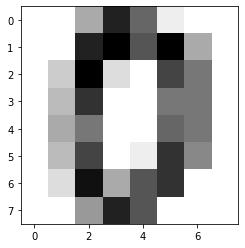

In [29]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

Vemos que, claramente, se trata de um número _zero_. Diante dessa informação, devemos, então, extrair a parte que nos interessa. 

Inicialmente, vamos alocar um `DataFrame` com as colunas `data` e `target` e fazer uso do numpy para isso.

In [30]:
digits_df = pd.DataFrame(data=np.c_[digits['data'], digits['target']])
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


Com isso, além de extrair somente a parte de interesse do conjunto de dados, já colocamos os dados no formato adequado para serem manipulados pelo algoritmo de classificação. Ou seja, cada linha corresponde a um objeto (uma imagem, nesse caso) e as colunas são as suas características (valores dos pixels da imagem).

In [31]:
import cv2
from google.colab.patches import cv2_imshow

## Separação do conjunto de dados

De maneira análoga ao exemplo anterior, precisamos separar os dados em um conjunto para treinar o modelo e outro para testar. Vamos utilizar, mais uma vez o _holdout_, mas como temos mais dados, vamos utilizar 30% para o conjunto de testes.

In [32]:
# para o sklearn, o melhor formato de tratar os dados é com vetores numpy.
data = digits.images.reshape((len(digits.images), -1))
# passamos os dados e a classe para realizar a separação
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=1)

Veja que não precisamos forçar o método a realizar uma separação estratificada, já que as classes estão balenceadas. Ou seja, uma simples amostragem aleatória deve proporcionar uma equidade de objetos tanto no conjunto de treinamento quanto no de testes.

## Treinamento e Validação

Vamos, agora, treinar o modelo. Para fins de simplificação, todos os parâmetros da rede vão ser _default_.

In [33]:
mlp = MLPClassifier()

In [34]:
mlp.fit(X_train,y_train)

MLPClassifier()

In [35]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       1.00      1.00      1.00        49
           2       1.00      0.98      0.99        49
           3       0.98      0.98      0.98        64
           4       0.97      1.00      0.98        61
           5       0.96      0.96      0.96        47
           6       1.00      1.00      1.00        51
           7       0.98      0.95      0.96        57
           8       0.96      1.00      0.98        46
           9       0.96      0.96      0.96        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Note que, mesmo com uma rede simples, é possível obter resultados satifatórios. Não é possível deixar de notar, no entanto, que algumas classes tiveram um desempenho mais baixo. Provavelmente, grafias semelhantes de dígitos diferentes são parecidos e foram confundidos durante o treinamento.

Vamos plotar a matriz de confusão (um pouco mais rebuscada) para analisar.

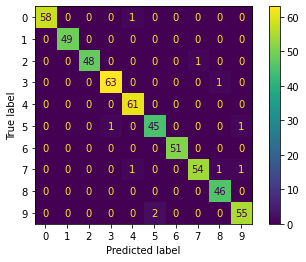

In [36]:
# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(digits.target_names))
# plota a matriz de confusão
cmd.plot()

Para ter uma noção melhor do resultado do aprendizado, podemos mostrar algumas imagens classificadas pelo modelo.

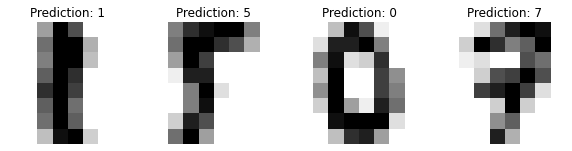

In [37]:
# constrio grid para exibição de quatro imagens
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# loop para percorrer as primeiras imagnes do conjunto de testes
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Diante da qualidade das imagens, é possível comprender que exista algum nível de erro aceitável. No entanto, com algum esforço a mais, é possível melhorar a rede para atingir um patamar de assertividade maior. Isso também fica como exercício.